In [3]:
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
# Define the date range
start_date = "2024-07-01 00:00"
end_date = "2024-07-21 23:00"


In [5]:
# Load original data
original_data = pd.read_excel("../../DATAFORMODELtrain200824.xlsx")

# Convert 'Date' column to datetime format
original_data['Date'] = pd.to_datetime(original_data['Date'], errors='coerce').dt.round('h')

In [11]:
# Filter original data for the specified date range
original_data_filtered = original_data[(original_data['Date'] >= start_date) & (original_data['Date'] <= end_date)]

# Load forecasted results
forecasted_data = pd.read_csv("nProphet_forecast.csv")

# Convert 'ds' (Date) column to datetime format
forecasted_data['ds'] = pd.to_datetime(forecasted_data['ds'], errors='coerce').dt.round('h')

# Filter forecasted data for the specified date range
forecasted_data_filtered = forecasted_data[(forecasted_data['ds'] >= start_date) & (forecasted_data['ds'] <= end_date)]


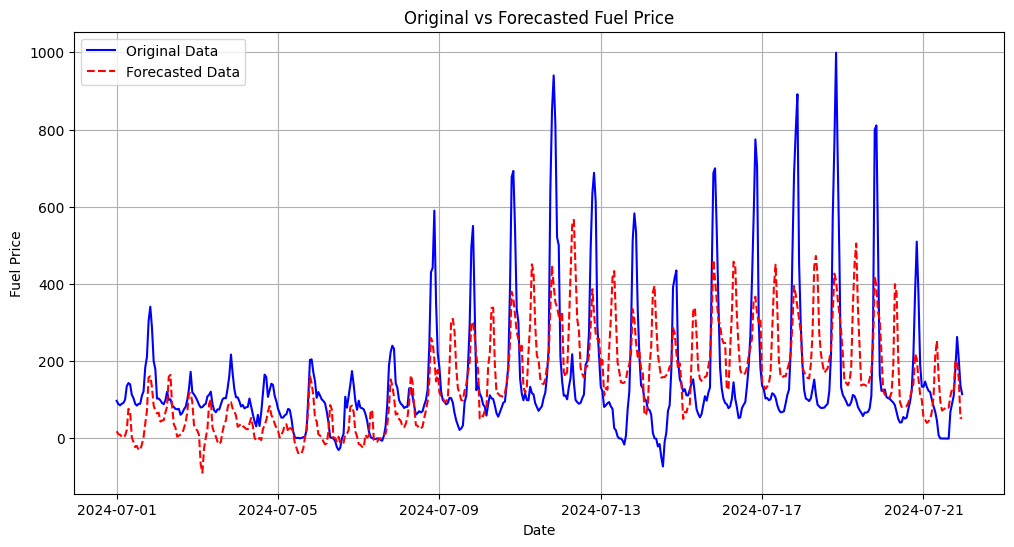

In [14]:
# Plot the original and forecasted results
plt.figure(figsize=(12, 6))
plt.plot(original_data_filtered['Date'], original_data_filtered['PriceHU'], label='Original Data', color='blue')
plt.plot(forecasted_data_filtered['ds'], forecasted_data_filtered['yhat1'], label='Forecasted Data', color='red', linestyle='--')

# Plot additional forecast uncertainty intervals if needed
if 'yhat_lower' in forecasted_data.columns and 'yhat_upper' in forecasted_data.columns:
    plt.fill_between(forecasted_data_filtered['ds'], 
                     forecasted_data_filtered['yhat_lower'], 
                     forecasted_data_filtered['yhat_upper'], 
                     color='red', alpha=0.2, label='Forecast Uncertainty Interval')

plt.xlabel('Date')
plt.ylabel('Fuel Price')
plt.title('Original vs Forecasted Fuel Price')
plt.legend()
plt.grid(True)
plt.show()